## Process Image for OCR

In [71]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

Link to images: https://drive.google.com/drive/folders/1QvqakK-93DDl7Sz9rbmcoTPaXgEFM9_X?usp=sharing

Some helpful formulae

In [72]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

Begin Processing

In [74]:
file_name = 'temp/erg_01.jpeg'
image = cv2.imread(file_name)
# plt.imshow(image)

In [76]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bw_gaussian = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
cv2.imwrite("temp/bw_gaussian.jpg", bw_gaussian)
plt.imshow(bw_gaussian)


True

### Noise Removal

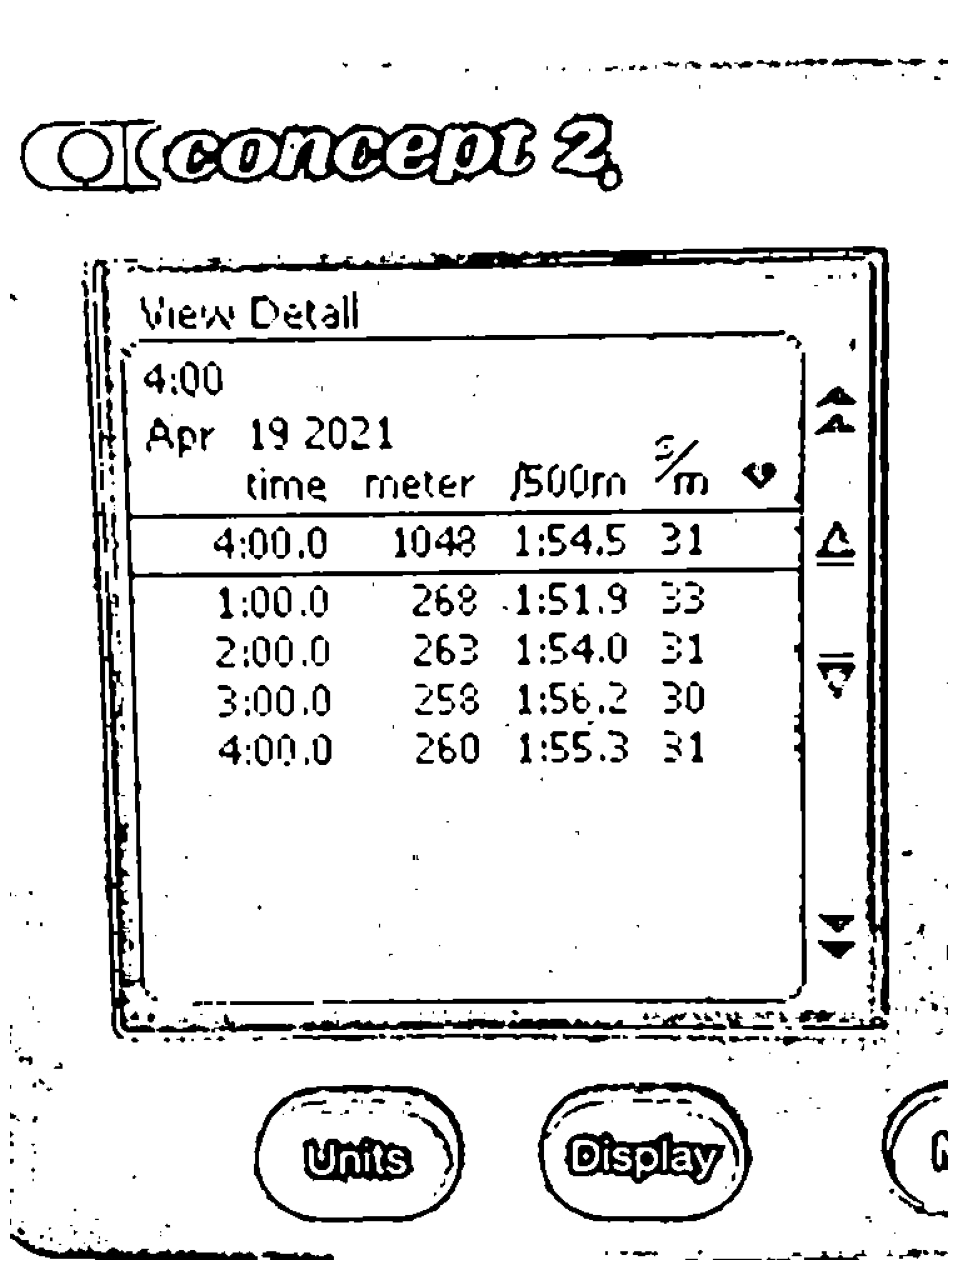

In [88]:
def noise_removal(image):
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 5)
    return (image)

no_noise = noise_removal(bw_gaussian)
# plt.imshow(no_noise)
cv2.imwrite("temp/no_noise.jpg", no_noise)
display('temp/no_noise.jpg')

### Crop Image

In [89]:
print(no_noise.shape)

(1000, 750)


In [102]:
crop_all_data = no_noise[200:650, 70:650]
crop_numbers = no_noise[400:630, 100:580]
crop_nums2 = no_noise[455:620, 110:580]
crop_summary = no_noise[406:444, 150:570]
crop_time = no_noise[406:630, 150:290]
# plt.imshow(crop_time)


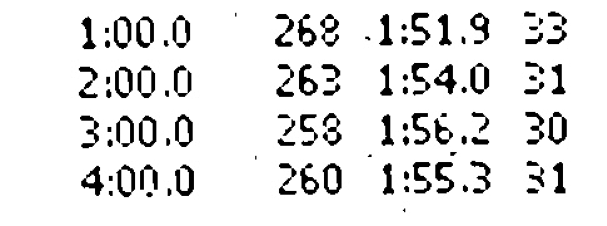

In [103]:
cv2.imwrite("temp/crop_all.jpg", crop_all_data)
cv2.imwrite('temp/crop_nums.jpg', crop_numbers)
cv2.imwrite('temp/crop_nums2.jpg', crop_nums2)
cv2.imwrite('temp/crop_summary.jpg', crop_summary)
cv2.imwrite('temp/crop_time.jpg', crop_time)

display('temp/crop_nums2.jpg')